In [2]:
import pandas as pd
bike_data = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [8]:
bike_data['day']=pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

In [9]:
numeric_features=['temp','atemp','hum','windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


C:\Users\65859\AppData\Local\Temp\ipykernel_19996\2513062490.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


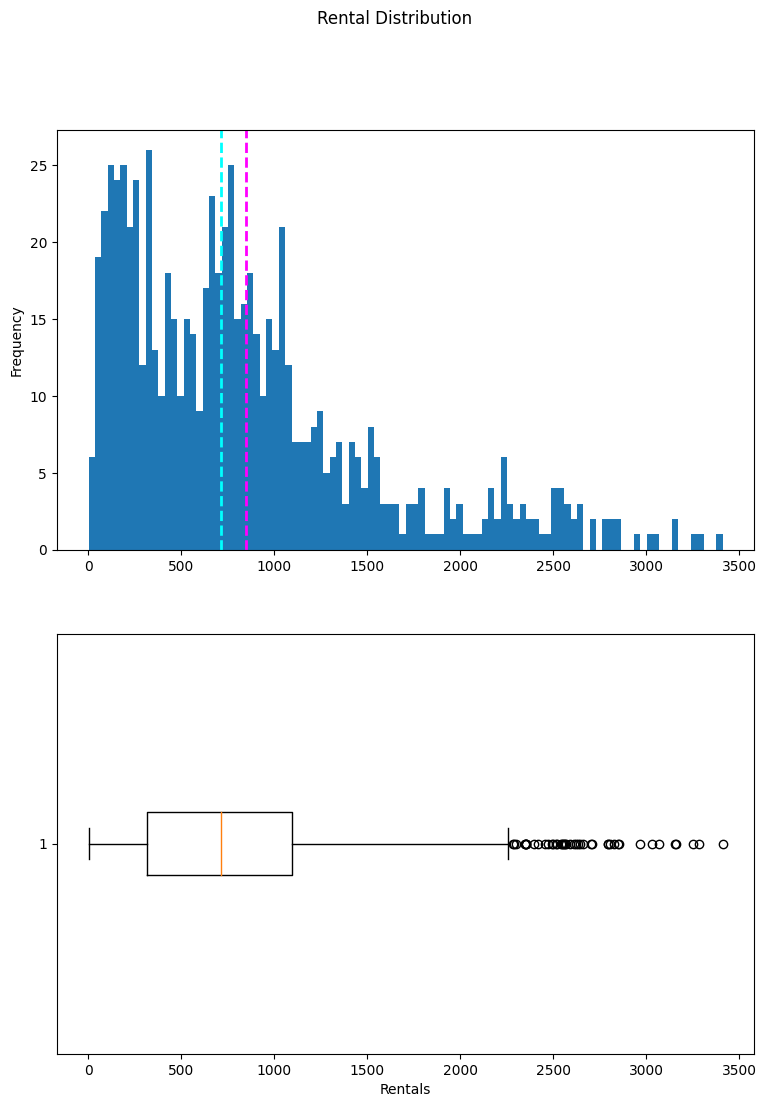

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

label = bike_data['rentals']

fig, ax = plt.subplots(2, 1, figsize=(9,12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

fig.suptitle('Rental Distribution')

fig.show()

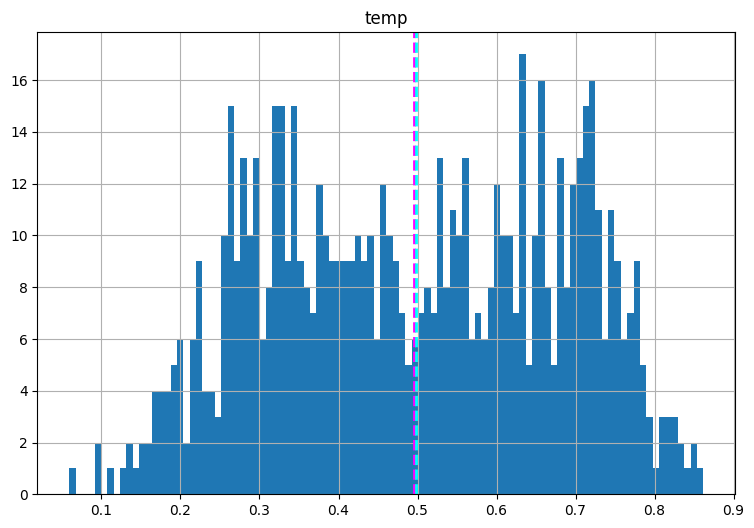

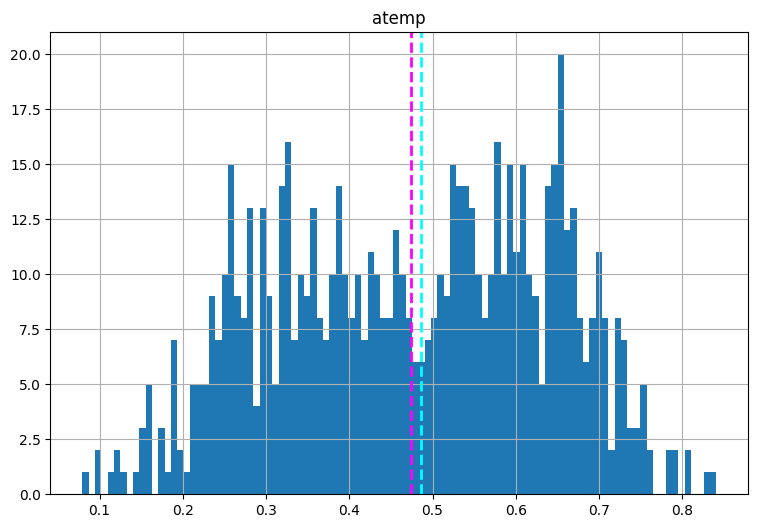

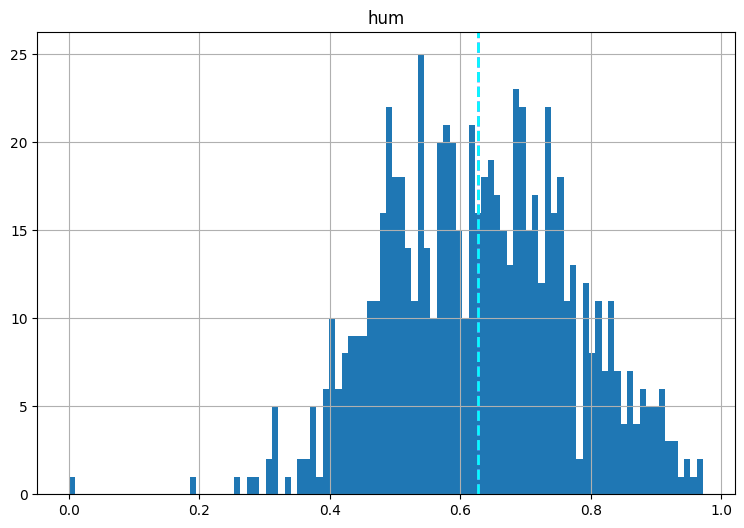

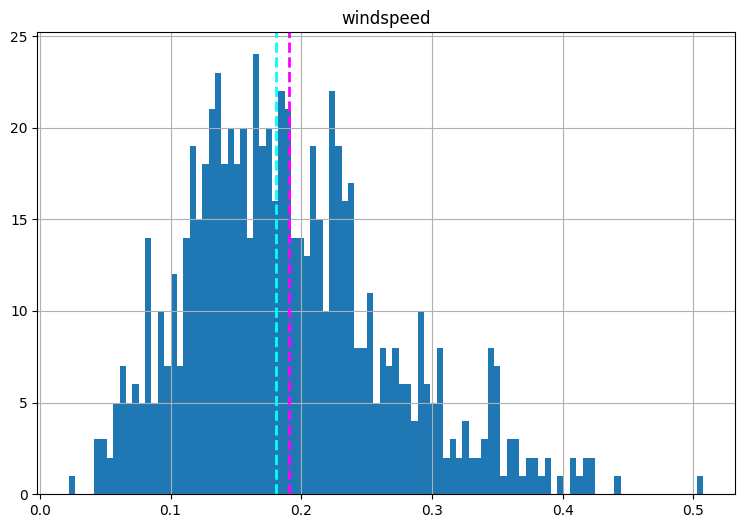

In [13]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

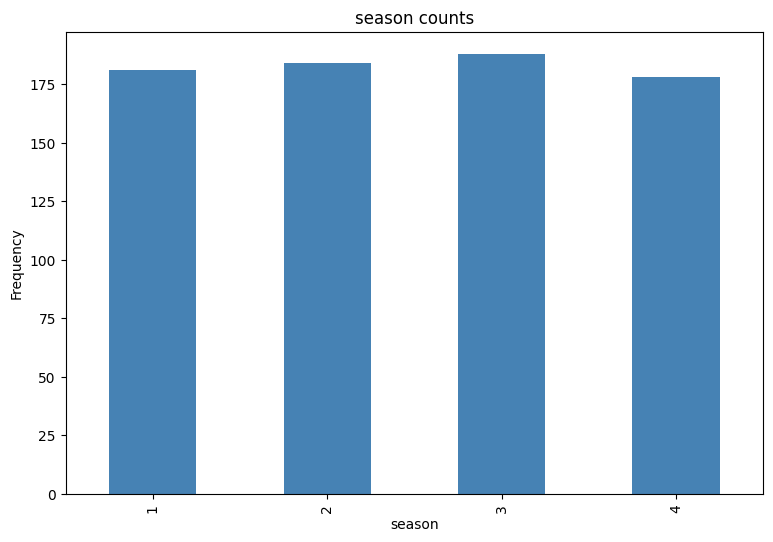

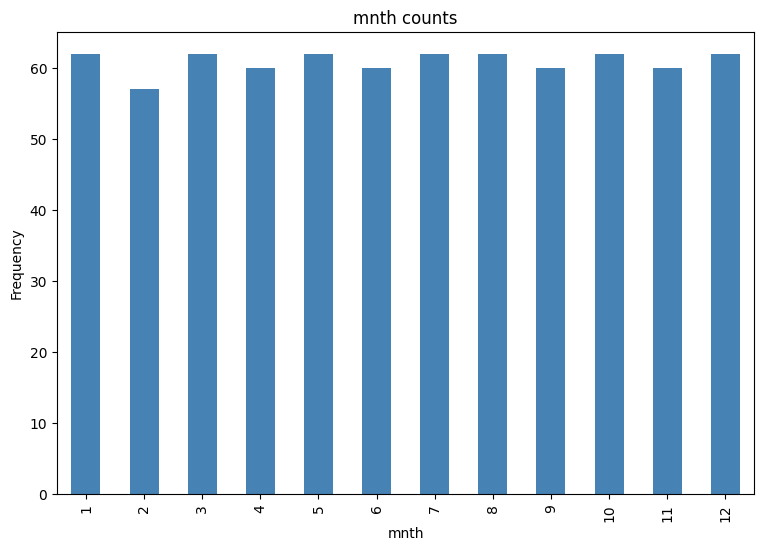

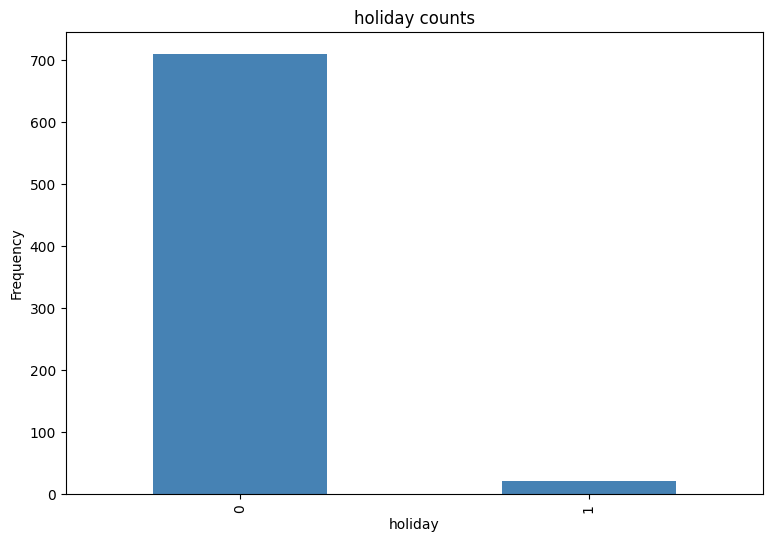

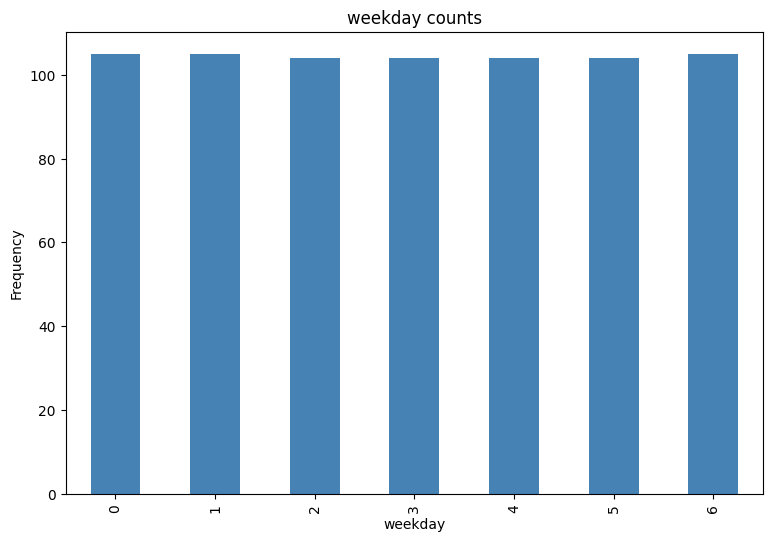

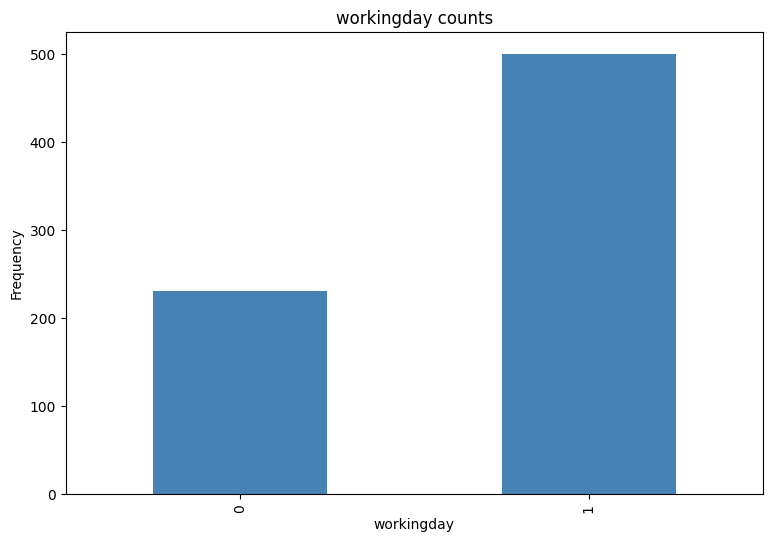

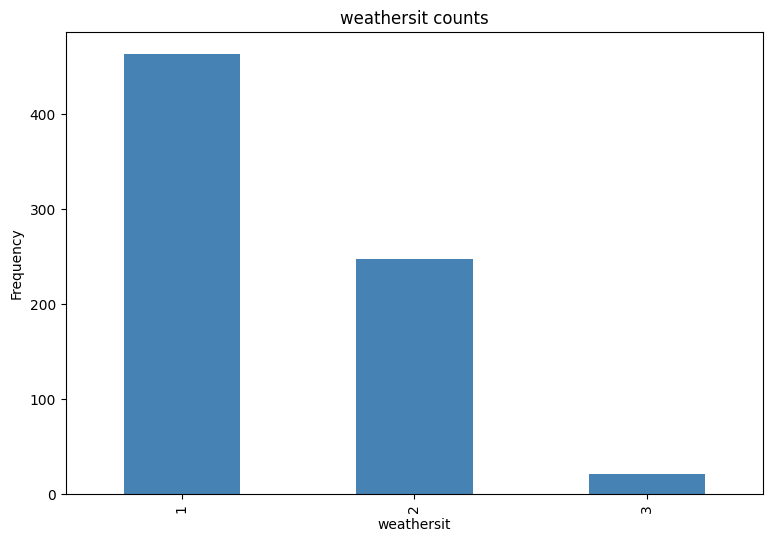

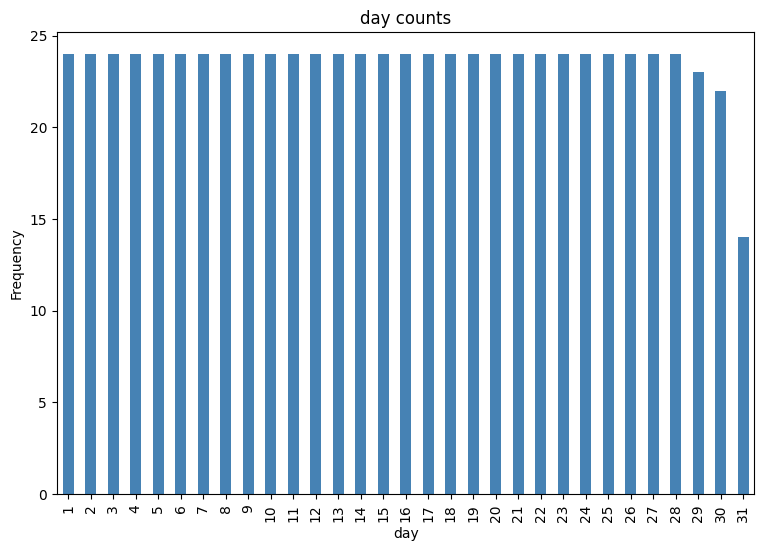

In [17]:
import numpy as np

categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

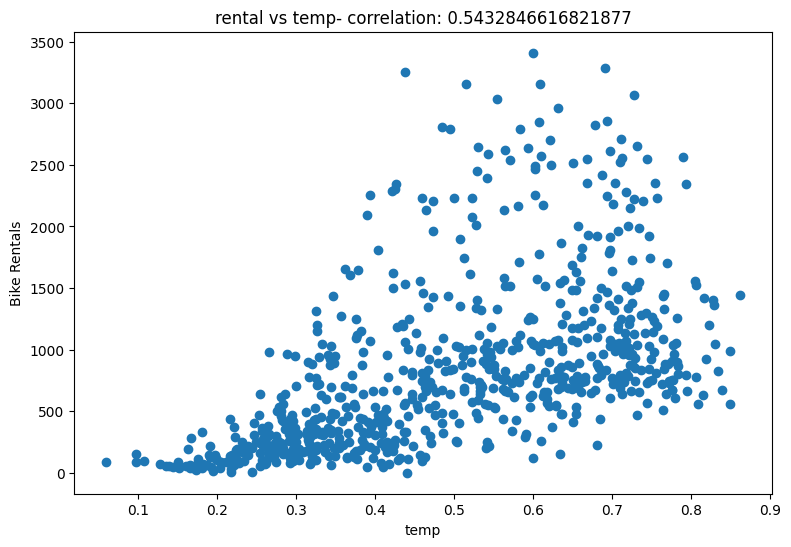

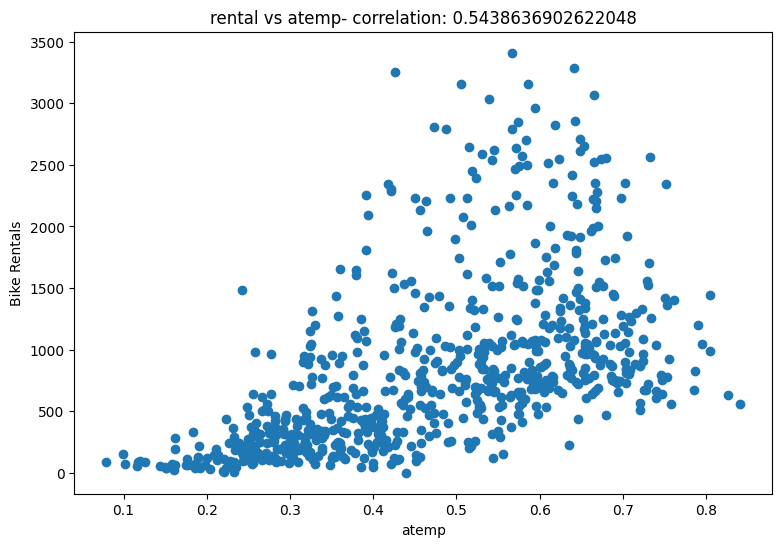

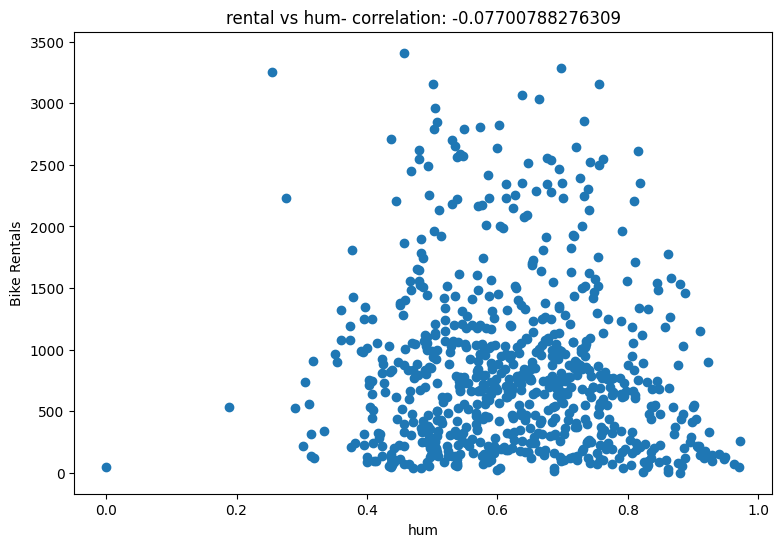

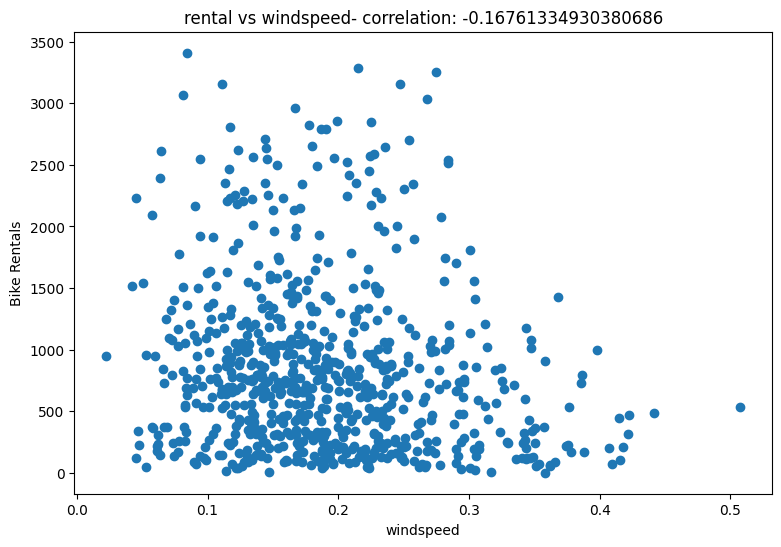

In [19]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label=bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rental vs '+ col +'- correlation: '+ str(correlation))
plt.show()

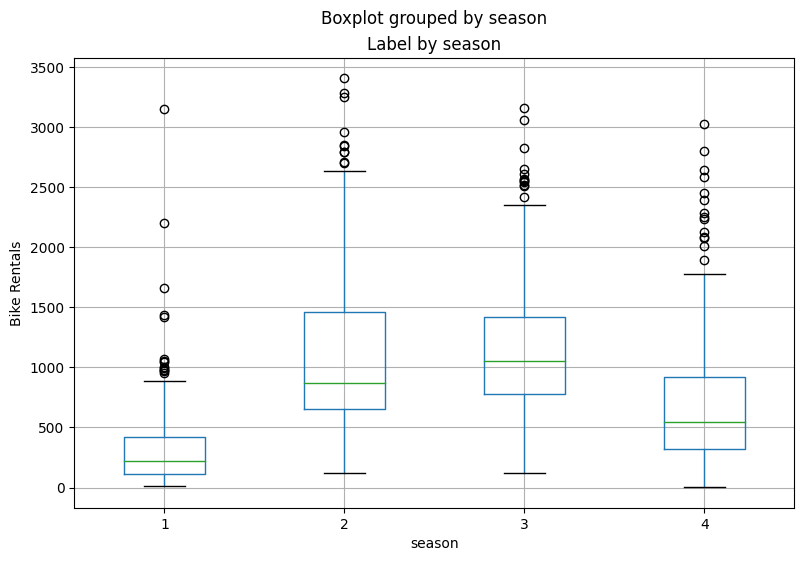

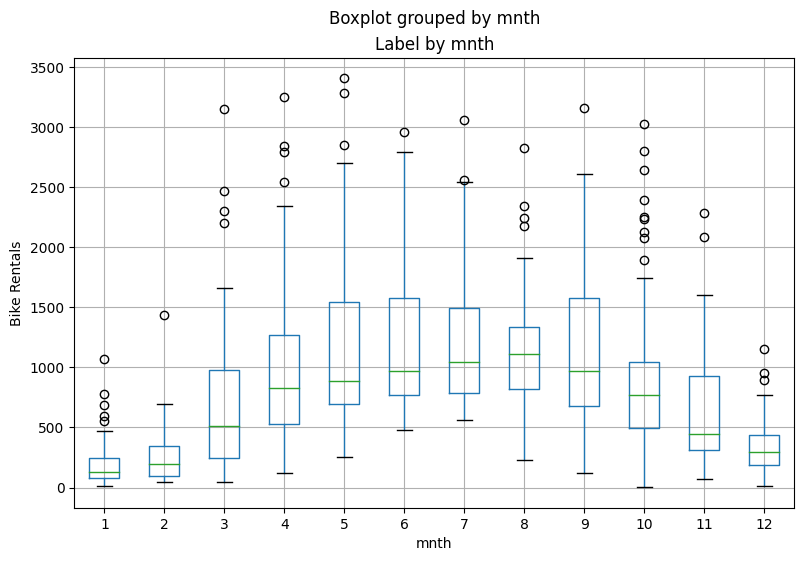

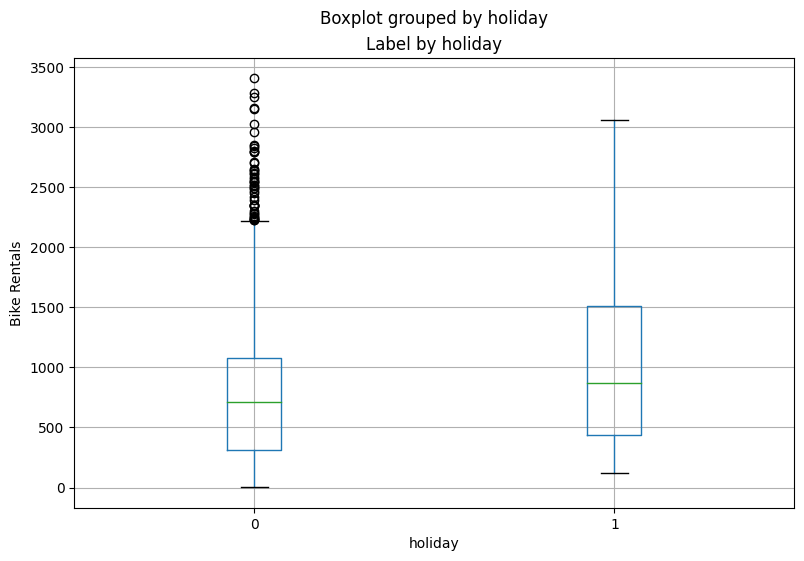

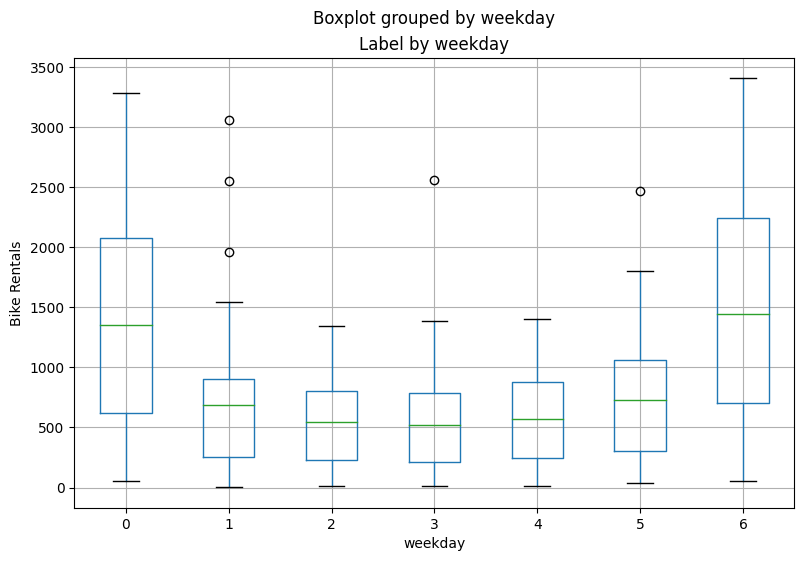

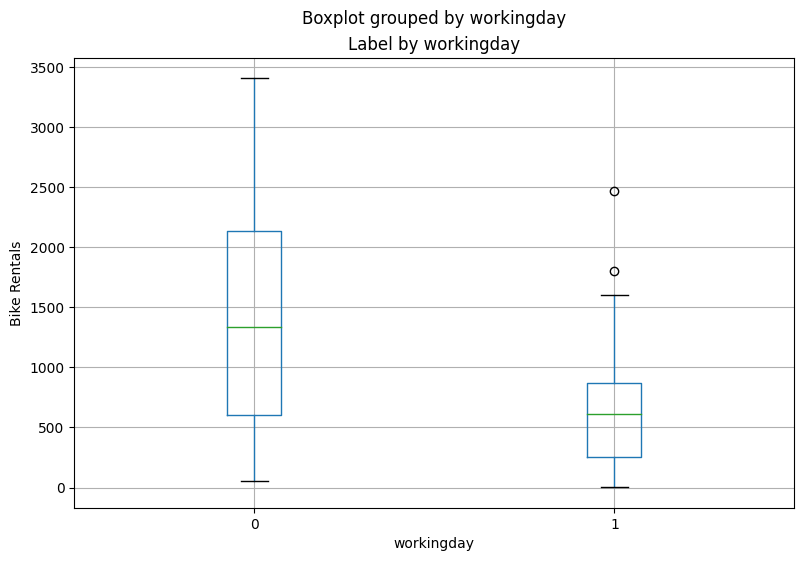

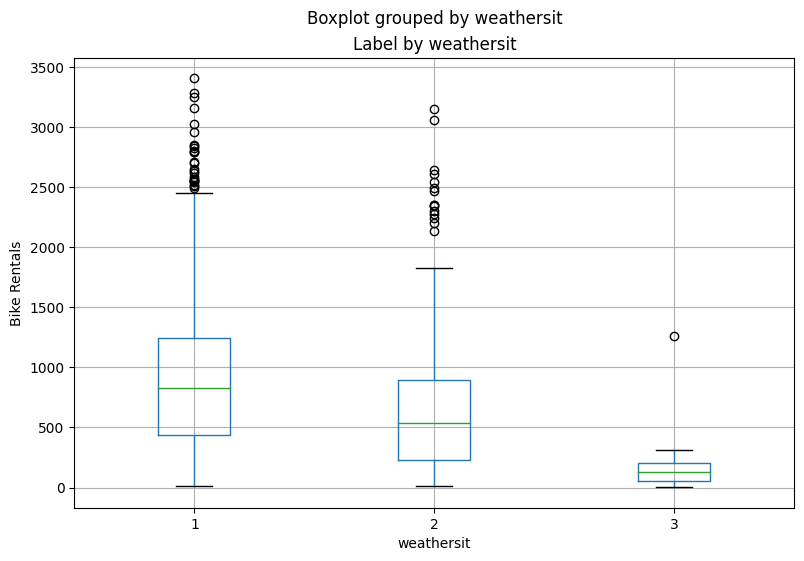

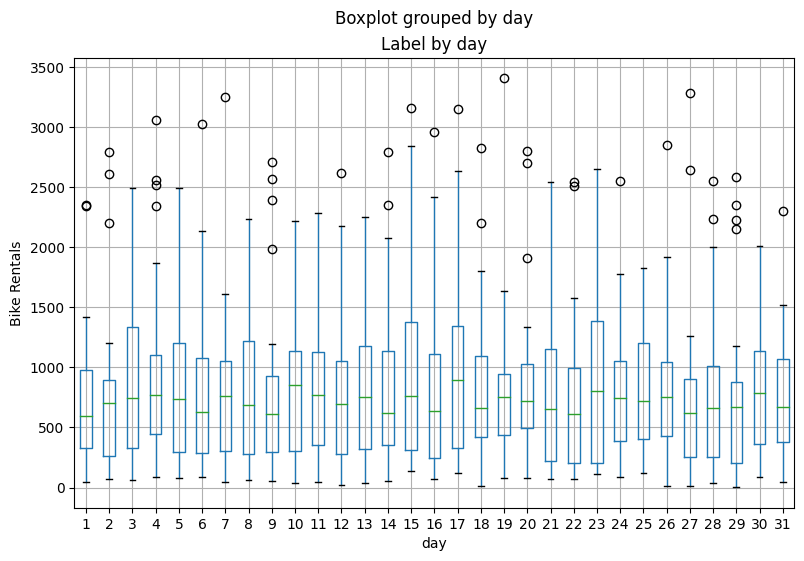

In [20]:
for col in categorical_features:
    fig = plt.figure(figsize = (9,6))
    ax=fig.gca()
    bike_data.boxplot(column='rentals', by=col, ax=ax)
    ax.set_title('Label by '+col)
    ax.set_ylabel('Bike Rentals')
plt.show()

In [51]:
X, y =bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values, bike_data[['rentals']].values
print('Features:',X[:10],'\nLabels:',y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(f'Training set: {X_train.shape[0]} rows\nTest set: {X_test.shape[0]}')

Training set: 511 rows
Test set: 220


#### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [54]:
prediction = model.predict(X_test)
np.set_printoptions(suppress=True)
print('predicted labels: ', np.round(prediction)[:10])
print('actual labels: ', np.round(y_test)[:10])

predicted labels:  [[1896.]
 [1184.]
 [1007.]
 [ -28.]
 [ 314.]
 [ 385.]
 [ 475.]
 [ 590.]
 [1476.]
 [ -22.]]
actual labels:  [[2418]
 [ 754]
 [ 222]
 [  47]
 [ 244]
 [ 145]
 [ 240]
 [ 555]
 [3252]
 [  38]]


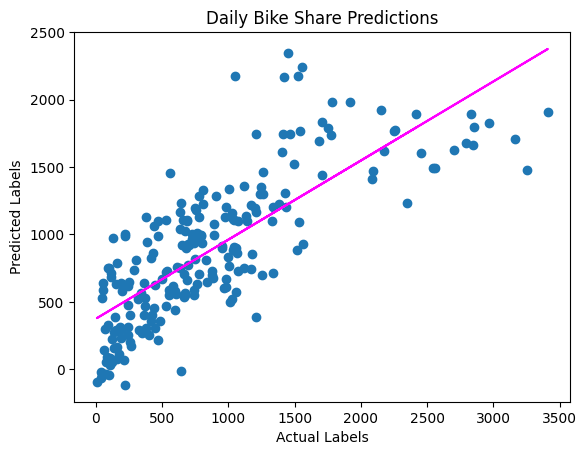

In [63]:
plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z= np.polyfit(y_test[:,0], prediction[:,0], 1)
p=np.poly1d(z)

plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, prediction)
mse

201972.55947035615

In [66]:
rmse=np.sqrt(mse)
rmse

449.4135728595167

In [67]:
r2=r2_score(y_test, prediction)
r2

0.6040454736919185

#### Lasso

In [69]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
model

Lasso()

In [70]:
prediction = model.predict(X_test)
prediction

array([1886.80888537, 1182.04912678,  967.32066068,  -30.92531361,
        300.57643658,  386.09811932,  493.66038053,  600.33832427,
       1445.05220407,  -15.54796526,  -38.4066835 ,  -20.22418307,
         91.88164777, 1013.05018712, 1185.2224169 ,  763.00700671,
        757.61135159, 1451.20923112,   75.42225801,  277.93641264,
       1191.75688691,  781.72229832,  314.82840508, 1749.16244316,
        595.28869176, 1705.77357167, 1439.8380675 , 1073.87665226,
       1588.69030771, 1666.38993128,  604.44433229,  992.5782303 ,
        453.96149059, 1957.75049631,  122.62280914, 1124.5925772 ,
       1130.28431021, 2309.54572997,  416.22331616,  365.98100999,
       1515.49234354,  977.35087589,  932.87550336,  274.42609922,
       1100.76847682,  815.43842909,  656.40741712, 1341.7179973 ,
        933.02848543,  954.43087757, 1534.93178441, 1133.91073033,
        516.40489298,  774.98711191,  939.61841981, 1343.72964819,
        264.98042206,  669.95496249, 1108.45040007,  267.33266

In [72]:
mse = mean_squared_error(y_test, prediction)
mse

201155.70593338404

In [74]:
rmse=np.sqrt(mse)
rmse

448.5038527519959

In [75]:
r2=r2_score(y_test, prediction)
r2

0.6056468637824488

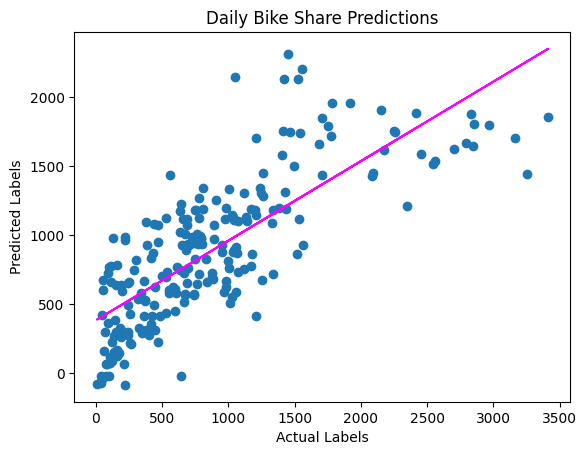

In [86]:
plt.scatter(y_test,prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z=np.polyfit(y_test[:,0],prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model = DecisionTreeRegressor().fit(X_train,y_train)
model

DecisionTreeRegressor()

In [88]:
tree = export_text(model)
tree

'|--- feature_6 <= 0.45\n|   |--- feature_4 <= 0.50\n|   |   |--- feature_7 <= 0.32\n|   |   |   |--- feature_8 <= 0.41\n|   |   |   |   |--- feature_1 <= 2.50\n|   |   |   |   |   |--- feature_9 <= 0.33\n|   |   |   |   |   |   |--- feature_9 <= 0.22\n|   |   |   |   |   |   |   |--- value: [515.00]\n|   |   |   |   |   |   |--- feature_9 >  0.22\n|   |   |   |   |   |   |   |--- value: [558.00]\n|   |   |   |   |   |--- feature_9 >  0.33\n|   |   |   |   |   |   |--- value: [317.00]\n|   |   |   |   |--- feature_1 >  2.50\n|   |   |   |   |   |--- feature_9 <= 0.28\n|   |   |   |   |   |   |--- feature_8 <= 0.37\n|   |   |   |   |   |   |   |--- value: [968.00]\n|   |   |   |   |   |   |--- feature_8 >  0.37\n|   |   |   |   |   |   |   |--- value: [981.00]\n|   |   |   |   |   |--- feature_9 >  0.28\n|   |   |   |   |   |   |--- feature_1 <= 7.00\n|   |   |   |   |   |   |   |--- value: [710.00]\n|   |   |   |   |   |   |--- feature_1 >  7.00\n|   |   |   |   |   |   |   |--- value:

In [91]:
prediction=model.predict(X_test)
mse=mean_squared_error(y_test, prediction)
mse

253069.76363636364

In [92]:
rmse=np.sqrt(mse)
rmse

503.060397602876

In [93]:
r2=r2_score(y_test,prediction)
r2

0.5038726119711247

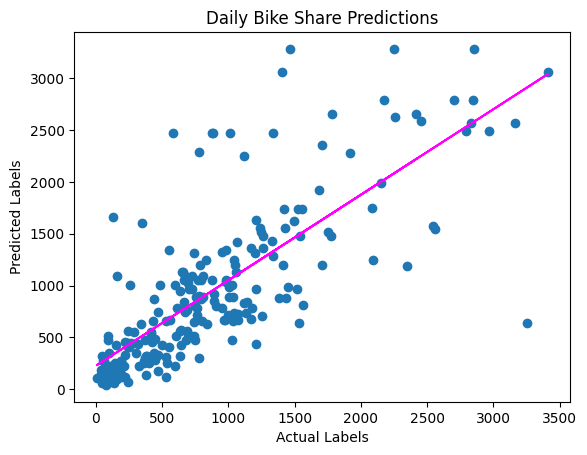

In [94]:
plt.scatter(y_test,prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z=np.polyfit(y_test[:,0],prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

C:\Users\65859\AppData\Local\Temp\ipykernel_19996\2491106492.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor().fit(X_train, y_train)


RandomForestRegressor() 

MSE: 114053.41177500002
RMSE: 337.7179470727015
R2: 0.7764054446226945


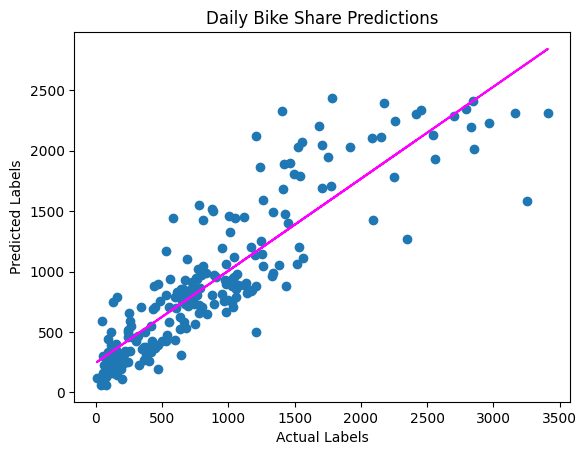

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test[:,0], predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

C:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor() 

MSE: 103522.856804823
RMSE: 321.7496803492165
R2: 0.7970499367057372


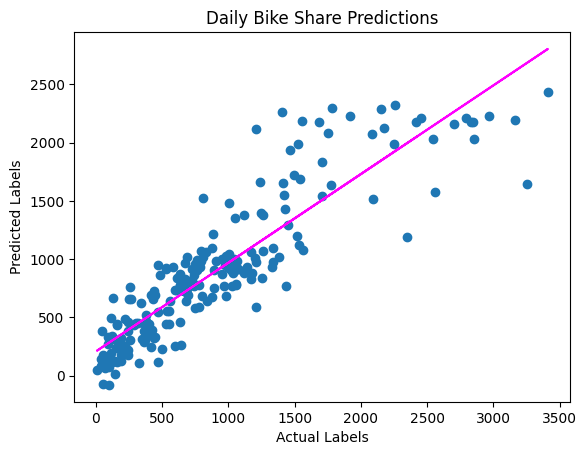

In [100]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test[:,0], predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

C:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Best parameter: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor()


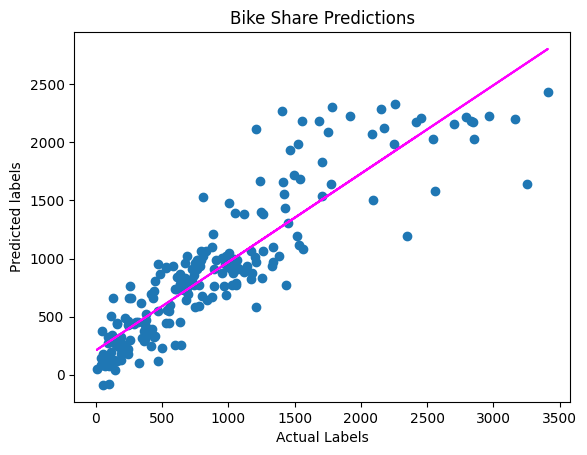

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

alg = GradientBoostingRegressor()

params={
    'learning_rate':[0.1, 0.5, 1.0],
    'n_estimators':[50, 100, 150]
}

score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, 
                          params,
                         scoring=score,
                         cv=3,
                         return_train_score=True)
gridsearch.fit(X_train, y_train)

print("Best parameter:", gridsearch.best_params_,"\n")

model=gridsearch.best_estimator_
print(model)

predictions = model.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test, predictions)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted labels')
plt.title('Bike Share Predictions')

z=np.polyfit(y_test[:,0], predictions, 1)
p=np.poly1d(z)

plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

numeric_features=[6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())
])

categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',GradientBoostingRegressor())
])

model = pipeline.fit(X_train, y_train)
print(model)

C:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


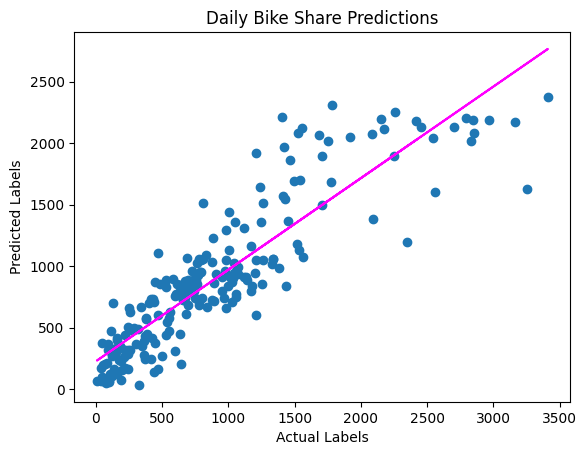

In [112]:
predictions=model.predict(X_test)

mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test, predictions)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test[:,0], predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

C:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


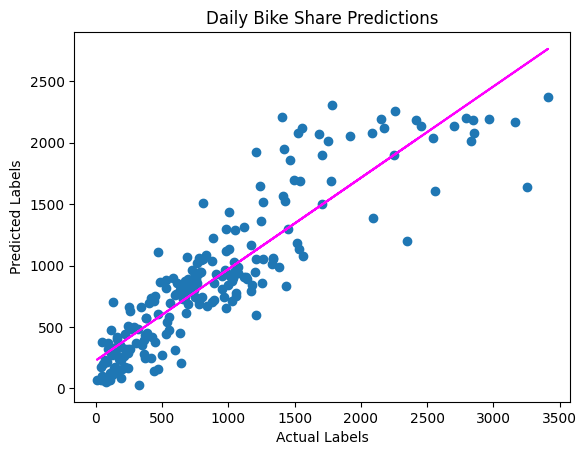

In [115]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',GradientBoostingRegressor())
])

model = pipeline.fit(X_train, y_train)
print(model)

predictions=model.predict(X_test)

mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test, predictions)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test[:,0], predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [116]:
mse, rmse, r2

(105267.90349050483, 324.4501556333497, 0.7936288822039447)

In [118]:
import joblib
filename='./bike-share.pkl'
joblib.dump(model, filename)


['./bike-share.pkl']

In [120]:
loaded_model=joblib.load(filename)

X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 122 rentals


In [121]:
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
493.0
929.0
428.0
430.0
491.0
